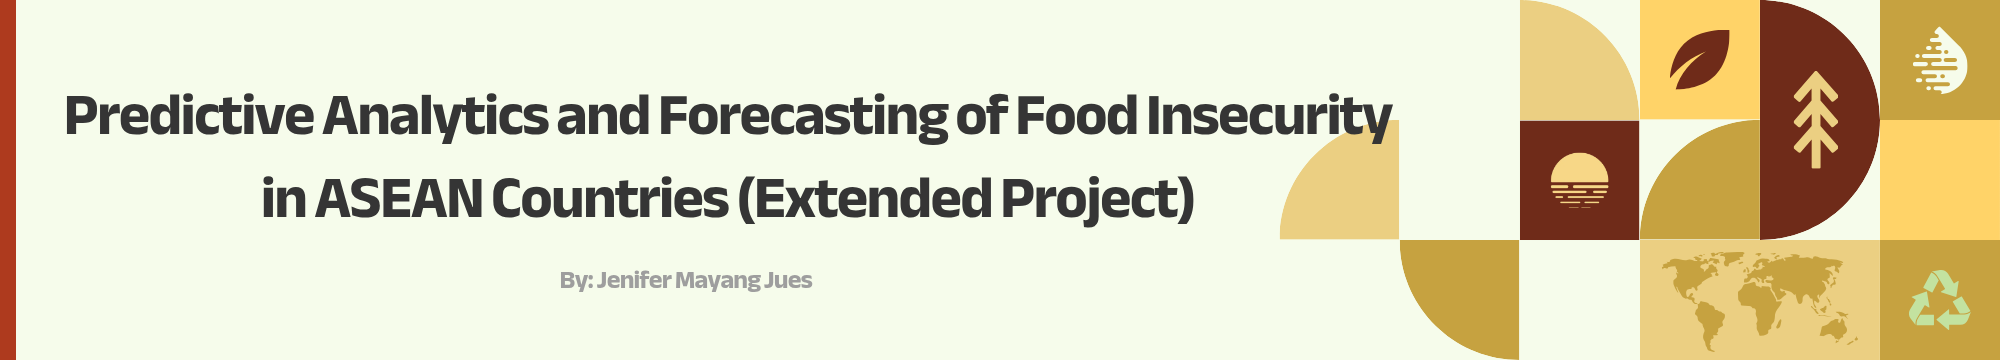

### Project Overview 

**Project Background**

This project is an independent extension of my university group coursework on predicting food insecurity in ASEAN countries using machine learning.

The original coursework focused on developing regression model using FAO and World Bank indicators to predict the prevalence of severe food insecurity or food insecurity rate.

For my portfolio, I expanded the project into an interactive Food Security Monitoring Dashboard by adding geographic visualization, time-series forecasting, and feature importance analysis to support policy-oriented insights.

The original coursework can be found on [github](https://github.com/Ruixue-Zhang/Data-Analytics-group-assignment/blob/main/Group%20Assignment%20Asean%20updated-latest.ipynb)

**Tools & Tech**

•	Python (Pandas, NumPy, Scikit-learn, Plotly)

•	Tableau (Dashboard storytelling)

•	Streamlit (Interactive deployment)

**Methodology**
- EDA
- Feature Importance Analysis
- Model Development for Forecasting : Prophet


**Metadata**

- Data source: [World Bank](https://data.worldbank.org/) and [FAO](https://www.fao.org/faostat/en/#data/FS)

- Size:

- Features:

**Problem Statement**

Food insecurity remains a critical socioeconomic challenge across ASEAN countries, affecting population health, economic stability, and policy planning.

Governments require data-driven tools to monitor trends, identify key drivers, and anticipate future risk levels. However, existing analyses are often static and lack predictive capabilities.

This project develops a machine learning–based monitoring and forecasting system to support early detection and policy intervention.

**Real World Impact**

• Enables early detection of rising food insecurity risk


• Supports evidence-based policy decision


• Identifies key socioeconomic drivers affecting food securi 

y
• Provides future projections for intervention plann  

ng
• Improves resource allocation strategies


In [ ]:
import os
os.getcwd()

In [ ]:
os.chdir('C:/Users/jenif\\Documents/My Data Science Project/Extension Project/Predictive Analytics and Forecasting of Food Insecurity in ASEAN Countries')

## 1. Data Load: Crop Dataset

In [ ]:
import numpy as np
import pandas as pd

rdf=pd.read_csv("Dataset/food_insecurity_SEA.csv")

In [ ]:
raw_df= pd.DataFrame(rdf)

## 2. Data Understanding

In [ ]:
raw_df.dtypes

In [ ]:
raw_df.head()

##### Creating a new copy of clean dataset

In [ ]:
edf = pd.DataFrame(raw_df.copy())

In [ ]:
edf.columns

**Creating a new dataset that contain Area, Year and only selected variables from feature selection in the previous or original coursework for EDA, Feature Importance Analysis and Model Development**

Selected Independent Variable 

- Average value of food production (constant 2004-2006 I/cap) (3-year average)
- Cereal import dependency ratio (percent) (3-year average)
- Incidence of caloric losses at retail distribution level (percent)
- Per capita food production variability (constant 2004-2006 thousand int per capita)
- Per capita food supply variability (kcal/cap/day)
- Percent of arable land equipped for irrigation (percent) (3-year average)
- Percentage of children under 5 years of age who are overweight (modelled estimates) (percent)
- Percentage of population using at least basic drinking water services (percent)
- Percentage of population using at least basic sanitation services (percent)
- Percentage of population using safely managed drinking water services (Percent)
- Political stability and absence of violence/terrorism (index)
- Prevalence of anemia among women of reproductive age (15-49 years)
- Share of dietary energy supply derived from cereals, roots and tubers (kcal/cap/day) (3-year average)
- Value of food imports in total merchandise exports (percent) (3-year average)
- Consumer Prices
- General Indices (2015 = 100)
- 

Independent variable
- Prevalence of severe food insecurity in the total population (percent) (3-year average)


In [ ]:
eda_df = edf[['Area', 'Year', 'Average value of food production (constant 2004-2006 I$/cap) (3-year average)',
       'Cereal import dependency ratio (percent) (3-year average)',
       'Incidence of caloric losses at retail distribution level (percent)',
       'Per capita food production variability (constant 2004-2006 thousand int$ per capita)',
       'Per capita food supply variability (kcal/cap/day)',
       'Percent of arable land equipped for irrigation (percent) (3-year average)',
       'Percentage of children under 5 years of age who are overweight (modelled estimates) (percent)',
       'Percentage of population using at least basic drinking water services (percent)',
       'Percentage of population using at least basic sanitation services (percent)',
       'Percentage of population using safely managed drinking water services (Percent)',
       'Political stability and absence of violence/terrorism (index)',
       'Prevalence of anemia among women of reproductive age (15-49 years)',
       'Share of dietary energy supply derived from cereals, roots and tubers (kcal/cap/day) (3-year average)',
       'Value of food imports in total merchandise exports (percent) (3-year average)',
       'Consumer Prices, General Indices (2015 = 100)', 'Prevalence of severe food insecurity in the total population (percent) (3-year average)']]



**Renaming 'Prevalence of severe food insecurity in the total population (percent) (3-year average)'column to 'Food Insecurity Rate'**

In [ ]:
eda_df.rename(columns = {'Prevalence of severe food insecurity in the total population (percent) (3-year average)':'Food Insecurity Rate', 'Percentage of population using at least basic drinking water services (percent)': 'water access', 'Percentage of population using safely managed drinking water services (Percent)' : 'irrigation'}, inplace = True)


In [ ]:
eda_df=pd.DataFrame(eda_df)
eda_df.head()

In [ ]:
eda_df.to_csv("eda_df.csv", index=False)

## 3. Exploratory Data Analysis

#### 3.1 Trend Analysis

***How has food insecurity rate changed over time in ASEAN countries***?


In [ ]:
import pandas as pd
import plotly.express as px


In [ ]:
df_trend = (
    eda_df.groupby(['Year', 'Area'], as_index=False)
      .agg({'Food Insecurity Rate': 'sum'})
)

In [ ]:
fig = px.line(
    df_trend,
    x='Year',
    y='Food Insecurity Rate',
    color='Area',
    markers=True,
    title='Food Insecurity Trend by Countries'
)

fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Food Insecurity Rate',
    legend_title='Area',
    width=1000,
    height=600
)

fig.show()



In [ ]:

from plotly.subplots import make_subplots
import plotly.graph_objects as go

area = df_trend['Area'].unique()

fig = make_subplots(
    rows=len(area),
    cols=1,
    shared_xaxes=True,
    vertical_spacing=0.04,
    subplot_titles=[f"{country}" for country in area]  # 👈 subtitles here
)

for i, country in enumerate(area, start=1):
    df_crop = df_trend[df_trend['Area'] == country]
    
    fig.add_trace(
        go.Scatter(
            x=df_crop['Year'],
            y=df_crop['Food Insecurity Rate'],
            mode='lines+markers',
            name=country,
            showlegend=False  # 👈 legend not needed since title shows crop
        ),
        row=i,
        col=1
    )

fig.update_layout(
    height=250 * len(area),
    title_text='Food Insecurity Rate Trends by Countries (2000-2020)',
)

fig.update_xaxes(title_text='Year', showticklabels=True)
fig.update_yaxes(title_text='Food Insecurity Rate')

fig.show()


**Key Findings:**

- Cambodia

Highest food insecurity level

Persistent structural issue

- Indonesia

Strong improvement over time

Significant decline

- Singapore

Very low food insecurity

Stable system

- Malaysia

Moderate levels with slight fluctuations

- Thailand / Vietnam

Improving trend overall


***Chloropleth projecting food insecurity rate on map***

In [ ]:
eda_df['Area'].unique()

Ensuring all state names in ISO code

In [ ]:
iso_map = {
    "Malaysia": "MYS",
    "Indonesia": "IDN",
    "Thailand": "THA",
    "Philippines": "PHL",
    "Viet Nam": "VNM",
    "Singapore": "SGP",
    "Cambodia": "KHM",
    "Lao People's Democratic Republic": "LAO",
    "Myanmar": "MMR",
    "Brunei Darussalam": "BRN"
}



In [ ]:
df_map = (
    eda_df.groupby('Area', as_index=False)
      .agg({'Food Insecurity Rate': 'mean'})
)

In [ ]:
df_map.head()

In [ ]:
df_map["iso_code"] = df_map["Area"].map(iso_map)

# Create choropleth
import plotly.express as px
fig = px.choropleth(
    df_map,
    locations="iso_code",
    color="Food Insecurity Rate",
    hover_name="Area",
    color_continuous_scale="Reds",
    title="Food Insecurity Rate in ASEAN Countries",
)

fig.update_geos(
    center=dict(lat=5, lon=115),
    projection_scale=4,
)

fig.update_layout(
    coloraxis_colorbar_title='Food Insecurity Rate',
    width=1000,
    height=600

)


fig.show()



**Correlation Matrix**

In [ ]:
corr_df = eda_df.drop(columns=["Area", "Year"]).select_dtypes(include=["float64","int64"])

In [ ]:
corr_matrix = corr_df.corr(method="pearson")

print(corr_matrix)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 15))

sns.heatmap(corr_df.corr(), cbar=True, annot=True)

plt.show()

In [ ]:
corr_long = (
    corr_matrix
    .reset_index()
    .melt(id_vars="index")
)

corr_long.columns = ["Feature_1", "Feature_2", "Correlation"]

print(corr_long.head())

In [ ]:
corr_long.to_csv("Dataset/correlation_table.csv", index=False)

In [ ]:
results = []

for country in eda_df["Area"].unique():
    subset = eda_df[eda_df["Area"] == country]
    numeric = subset.select_dtypes(include=["int64","float64"])
    
    corr = numeric.corr().reset_index().melt(id_vars="index")
    corr.columns = ["Feature_1","Feature_2","Correlation"]
    corr["Area"] = country
    
    results.append(corr)

final_corr = pd.concat(results)

final_corr.to_csv("Dataset/correlation_by_country.csv", index=False)

## 4. Feature Importance Analysis

In [ ]:
fi_df= eda_df.copy()

In [ ]:
fi_df.head()

**Train model**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

X = fi_df.drop(['Food Insecurity Rate', 'Area', 'Year'], axis =1)   # your selected independent variables
y = fi_df["Food Insecurity Rate"]

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

**Save the model**

In [ ]:
import joblib
joblib.dump(model, "food_model.pkl")

**Extract Feature Importance**

In [ ]:
import pandas as pd

importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": model.feature_importances_
}).sort_values("Importance", ascending=False)

**Visualize Feature Importance**

In [ ]:
importance_df.dtypes

In [ ]:
importance_df

#### 4.1 Feature Importance Bar Chart

To shows which variables contribute the most to the model’s prediction of food insecurity
- Which variables does the model rely on most?

In [ ]:
import plotly.express as px

fig = px.bar(
    importance_df,
    x="Importance",
    y="Feature",
    orientation="h",
    title="Feature Importance"
)

fig.update_layout(
    width=1000,
    height=600

)

fig.show()

**Key Findings**
  
- Percentage of population using at least basic drinking water services (percent) Basic Drinking Water (Highest importance ~0.53) 

Strongest predictor of food insecurity

Countries with poor water access tend to have higher food insecurity\

- Per capita food production variability (~0.12)

Food production instability increases food insecurity risk

- Percentage of population using safely managed drinking water services (~0.10)

Better sanitation → lower food insecurity risk

- Percent of arable land equipped for irrigation (~0.07)

Higher irrigation improves food supply

- Prevalence of anemia among women of reproductive age (~0.07)

Links nutrition and food security

#### 4.2 Top Drivers

To highlights the most influential subset of 
- What are the main drivers of food insecurity?

In [ ]:
top_features = importance_df.tail(10)

fig = px.bar(
    top_features,
    x="Importance",
    y="Feature",
    orientation="h",
    title="Top Drivers of Food Insecurity"
)

fig.show()

**Key Findings**

Most influential predictors:
  
🔹 Incidence of caloric losses (highest in this chart)
  

Food waste / distribution inefficiency is major driver
  

Indicates supply chain inefficiency matters

🔹 Food production value

Higher production → lower insecurity

🔹 Sanitation access

Infrastructure again important

🔹 Consumer price index

Food prices influence access to food

#### 4.3 SHAP

Explains how each feature affects predictions and in which direction
- How each variable changes the prediction and by how much

In [ ]:
!pip install shap

In [ ]:
import shap

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

shap.summary_plot(shap_values, X)

**Key Interpretations**

- High food production variability → increases food insecurity

- Poor water access → increases food insecurity

- Better sanitation → reduces food insecurity
  
- Higher political stability → reduces food insecurity

In [ ]:
importance_df.to_csv("feature_importance.csv", index=False)

### 5. Model Development

In [ ]:
model_df = fi_df[['Food Insecurity Rate', 'Area', 'Year']]

In [ ]:
model_df.to_csv("model_df.csv", index=False)

In [ ]:
model_df.rename(columns = {'Area': 'Country'}, inplace = True)
model_df

In [ ]:
!pip install prophet

**Model Training**

In [ ]:
from prophet import Prophet
import pickle
import os

models = {}

for country in model_df["Country"].unique():

    # Filter country data
    country_df = model_df[model_df["Country"] == country]

    ts = country_df[["Year", "Food Insecurity Rate"]]
    ts.columns = ["ds", "y"]

    # Convert year → datetime (important)
    ts["ds"] = pd.to_datetime(ts["ds"], format="%Y")

    # ✅ Create NEW model each loop
    model = Prophet()

    # Train model
    model.fit(ts)

    # Store model in dictionary
    models[country] = model



**Save model**

In [ ]:
os.makedirs("models/forecast", exist_ok=True)

for country in model_df["Country"].unique():

    country_df = model_df[model_df["Country"] == country]
    ts = country_df[["Year", "Food Insecurity Rate"]]
    ts.columns = ["ds", "y"]
    ts["ds"] = pd.to_datetime(ts["ds"], format="%Y")

    model = Prophet()
    model.fit(ts)


    # Save model
    model_path = f"models/forecast/{country}_prophet.pkl"
    joblib.dump(model, model_path)

print("All models saved successfully!")

### 6. Evaluation

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
from prophet import Prophet

def evaluate_forecast(ts_df, test_years=3):

    # Train/Test split
    train = ts_df.iloc[:-test_years]
    test = ts_df.iloc[-test_years:]

    # Train model
    model = Prophet()
    model.fit(train)

    # Forecast future
    future = model.make_future_dataframe(periods=test_years, freq="Y")
    forecast = model.predict(future)

    predictions = forecast.tail(test_years)["yhat"].values
    actual = test["y"].values

    # Metrics
    mae = mean_absolute_error(actual, predictions)
    rmse = np.sqrt(mean_squared_error(actual, predictions))
    mape = np.mean(np.abs((actual - predictions) / actual)) * 100

    return model, mae, rmse, mape

In [ ]:
model, mae, rmse, mape = evaluate_forecast(ts)

models = {}
results = []

for country in model_df["Country"].unique():

    country_df = model_df[model_df["Country"] == country]

    ts = country_df[["Year", "Food Insecurity Rate"]].copy()
    ts.columns = ["ds", "y"]
    ts.loc[:, "ds"] = pd.to_datetime(ts["ds"], format="%Y")

    model, mae, rmse, mape = evaluate_forecast(ts)

    models[country] = model

    results.append({
        "country": country,
        "MAE": mae,
        "RMSE": rmse,
        "MAPE": mape
    })


In [ ]:
results_df = pd.DataFrame(results)
results_df

In [ ]:
results_df.to_csv("models/forecast_accuracy.csv", index=False)

**Key Interpretations**

1. Good performing countries :

- Indonesia

- Malaysia

- Singapore

2. Moderate performing countries :

- Cambodia

- Laos

3. High Error performance countries:

- Thailand

- Vietnam

4. Poor reliability countries:

- Brunei

- Myanmmar

Possible reason for good performance:

- More stable trend patterns

- Better data consistency


Possible reason for poor performance:

- Volatile trends

- Sudden changes

- Limited data points


**Data Limitation**
  
•	Aggregated annual data only

•	Weather, soil, and policy factors not included
